In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import math
from IPython.display import display, Math

PRECISION = 5
pd.set_option('display.float_format', '{:.3f}'.format)
np.set_printoptions(precision=PRECISION)

In [198]:
_data = [
    14.495, 4.715, 7.175, 8.428, 11.093, 3.375, 12.906, 8.415, 8.916, 13.48,
    5.343, 17.985, 15.992, 13.89, 9.838, 13.924, 9.012, 9.458, 17.69, 6.542,
    14.396, 8.592, 8.206, 14.237, 7.357, 10.821, 12.767, 16.058, 12.959, 4.354,
    12.888, 10.268, 9.182, 5.647, 8.282, 2.903, 15.988, 12.959, 14.919, 6.339,
    2.375, 17.921, 9.097, 15.85, 11.449, 11.095, 9.493, 12.175, 7.479, 13.535,
    9.234, 6.078, 4.964, 6.355, 13.957, 12.911, 15.694, 14.286, 9.869, 5.175,
    5.811, 7.241, 5.814, 3.086, 6.875, 3.878, 5.333, 15.134, 12.924, 9.159,
    4.727, 4.646, 15.535, 9.919, 17.117, 10.351, 16.892, 12.423, 10.511, 4.942,
    4.843, 9.927, 15.864, 3.635, 17.963, 8.25, 5.14, 6.734, 12.622, 13.325,
    3.377, 16.195, 12.04, 12.768, 2.744, 14.186, 9.354, 15.439, 14.612, 15.649,
    8.681, 5.006, 3.608, 2.867, 12.177, 15.506, 7.683, 14.022, 17.103, 8.905,
    12.173, 17.757, 6.883, 2.666, 9.861, 5.743, 16.175, 15.308, 7.039, 15.238
]

# _data = [
#     1.913, 2.875, 3.302, 2.338, 3.967, 0.702, 0.655, 2.038, 0.342, 0.331,
#     8.936, 7.5, 0.86, 1.763, 3.927, 2.003, 3.036, 6.432, 3.267, 2.78,
#     0.679, 2.7, 0.927, 3.094, 2.928, 2.274, 4.5, 3.229, 5.441, 2.86, 
#     8.084, 4.336, 3.673, 1.261, 1.217, 0.383, 6.351, 0.561, 0.276, 3.415,
#     2.626, 1.753, 2.088, 0.552, 4.465, 5.842, 6.888, 1.189, 0.454, 5.123,
#     3.136, 0.25, 3.536, 0.369, 0.859, 8.418, 3.623, 2.261, 2.289, 2.373, 
#     3.884, 3.107, 0.02, 0.354, 6.632, 4.586, 1.594, 2.683, 10.39, 0.648,
#     0.471, 10.102, 0.094, 0.192, 0.471, 6.658, 4.263, 0.049, 4.102, 0.818,
#     0.617, 1.39, 1.527, 5.405, 2.492, 5.335, 0.521, 1.716, 0.489, 0.228,
#     2.839, 2.647, 1.243, 5.501, 1.115, 7.52, 4.539, 1.494, 0.865, 0.869
# ]

np.size(_data)

120

In [199]:
# Вариационный ряд
_parsedData = [_data[i:i+10] for i in range(0, len(_data), 10)] 

_parsedData

[[14.495, 4.715, 7.175, 8.428, 11.093, 3.375, 12.906, 8.415, 8.916, 13.48],
 [5.343, 17.985, 15.992, 13.89, 9.838, 13.924, 9.012, 9.458, 17.69, 6.542],
 [14.396, 8.592, 8.206, 14.237, 7.357, 10.821, 12.767, 16.058, 12.959, 4.354],
 [12.888, 10.268, 9.182, 5.647, 8.282, 2.903, 15.988, 12.959, 14.919, 6.339],
 [2.375, 17.921, 9.097, 15.85, 11.449, 11.095, 9.493, 12.175, 7.479, 13.535],
 [9.234, 6.078, 4.964, 6.355, 13.957, 12.911, 15.694, 14.286, 9.869, 5.175],
 [5.811, 7.241, 5.814, 3.086, 6.875, 3.878, 5.333, 15.134, 12.924, 9.159],
 [4.727, 4.646, 15.535, 9.919, 17.117, 10.351, 16.892, 12.423, 10.511, 4.942],
 [4.843, 9.927, 15.864, 3.635, 17.963, 8.25, 5.14, 6.734, 12.622, 13.325],
 [3.377, 16.195, 12.04, 12.768, 2.744, 14.186, 9.354, 15.439, 14.612, 15.649],
 [8.681, 5.006, 3.608, 2.867, 12.177, 15.506, 7.683, 14.022, 17.103, 8.905],
 [12.173, 17.757, 6.883, 2.666, 9.861, 5.743, 16.175, 15.308, 7.039, 15.238]]

<center><p>1. Крайние члены вариационного ряда и размах выборки</p></center>

In [200]:
# Крайние члены
_maxEl = np.max(_parsedData)
_minEl = np.min(_parsedData)

print(f"Крайние члены: {_maxEl}, {_minEl}")

# Размах выборки
_range = np.round(_maxEl - _minEl, PRECISION)

print(f"Размах выборки: {_range}")

Крайние члены: 17.985, 2.375
Размах выборки: 15.61


<center><p>2. Осуществите группировку данных</p></center>

In [201]:
# Найдем число интервалов по правилу Стерджеса
_n = len(_data)
_k = 1 + np.trunc(np.log2(_n))

print(f"Количество интервалов: {_k}")

# Шаг интервала
_h = _range / _k

print(f"Шаг интервала: {_h}")

Количество интервалов: 7.0
Шаг интервала: 2.23


In [202]:
# функция для нахождения частот
def findFrequency(minim, maxim, data):
    count = 0

    for el in data:
        if minim <= el < maxim:
            count += 1

    return count

In [203]:
intervals           = [i for i in range(1, int(_k) + 1)] # номер интервала
tableRanges         = [] # интервал
frequencies         = [] # частота
relativeFrequencies = [] # относительная частота
midRanges           = [] # середина интервала

curr = _minEl
while (math.floor(curr + _h) <= _maxEl):
    firstEl  = curr                        # первый элемент текущего интервала 
    secondEl = round(curr + _h, PRECISION) # второй элемент текущего интервала
    tableRanges.append((firstEl, secondEl))

    midRange = round((firstEl + secondEl)/2, PRECISION) # середина интервала
    midRanges.append(midRange)

    frequency = findFrequency(firstEl, secondEl, _data) # частота 
    frequencies.append(frequency)                          
 
    relativeFrequency = round(frequency / _n, PRECISION) # относительная частота
    relativeFrequencies.append(relativeFrequency)

    curr = round(curr + _h, PRECISION)

In [204]:
_intervalRange = pd.DataFrame({'номер интервала':       intervals, 
                               'интервал':              tableRanges, 
                               'середина интервала':    midRanges,
                               'частота':               frequencies,
                               'относительная частота': relativeFrequencies})

_intervalRange

,номер интервала,интервал,середина интервала,частота,относительная частота
0,1,"(2.375, 4.605)",3.490,12,0.100
1,2,"(4.605, 6.835)",5.720,20,0.167
2,3,"(6.835, 9.065)",7.950,18,0.150
3,4,"(9.065, 11.295)",10.180,18,0.150
4,5,"(11.295, 13.525)",12.410,17,0.142
5,6,"(13.525, 15.755)",14.640,20,0.167
6,7,"(15.755, 17.985)",16.870,14,0.117


In [205]:
# границы интервалов
_int1 = midRanges - _h/2
_int1 = np.append(_int1, _maxEl)

print(f'границы интервалов: {_int1}')

границы интервалов: [ 2.375  4.605  6.835  9.065 11.295 13.525 15.755 17.985]


<center><p>3. По сгруппированным данным постройте гистограмму относительных частот</p></center>

In [206]:
def buildLine(x, y, color):
    plt.plot(x, y, color=color, linestyle='-', linewidth=1.5)

In [207]:
def buildBar(x, y, overlay = None, showAxis = True):
    RED   = '#6F1D1B'
    BLUE  = '#00ADB5'
    WHITE = '#EEEEEE'
    BLACK = '#393E46' # #253031 #0D1B1E #1C2321

    # Define font sizes
    SIZE_DEFAULT = 14
    SIZE_LARGE   = 16
    SIZE_TICKS   = 10
    plt.rc("font", weight="normal")          # controls default font
    plt.rc("font", size=SIZE_DEFAULT)        # controls default text sizes
    plt.rc("axes", titlesize=SIZE_LARGE)     # fontsize of the axes title
    plt.rc("axes", labelsize=SIZE_DEFAULT)   # fontsize of the x and y labels
    plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
    plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

    fig, ax = plt.subplots(
        figsize=(6, 5)
    )

    xticks = [i for i in range(math.floor(min(x)) - 1, math.ceil(max(x)) + 2)]

    # Hide the all but the bottom spines (axis lines)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

    if not showAxis:
        ax.spines["bottom"].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    ax.spines["bottom"].set_bounds(min(xticks), max(xticks))

    # histogtamm 2.25 1.49
    plt.bar(x, y, width=2.25, color='white', edgecolor='black', linewidth=1.5, align='center')
    # counts, bins, patches = plt.hist(_data, bins=int(_k),  color='white', edgecolor='black', linewidth=1.5)

    # line
    if overlay is None:
        buildLine(x, y, RED)
    else:
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        calculate_y = overlay(x)
        plt.plot(x, calculate_y, color=BLUE, linestyle='-', linewidth=1.5)

    # axis names
    if showAxis:
        plt.xlabel('int')
        plt.ylabel('$\\frac{p_k}{h}$', fontsize=20)
        plt.xticks(xticks)
    else:
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.set_xticks([])
        ax.set_yticks([])

    # Adjust the font size of the tick labels
    plt.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    plt.show()


In [208]:
def overlayPlot(overlay):
    BLUE  = '#00ADB5'

    plt.hist(_data, bins=int(_k), color='white', edgecolor='black', density=True, alpha=0.6)

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    
    calculate_y, label = overlay(x)
    plt.plot(x, calculate_y, color=BLUE, linestyle='-', linewidth=2, label=label)

    plt.legend()
    plt.show()

x: [3.49, 5.72, 7.95, 10.18, 12.41, 14.64, 16.87]
y: [0.04484 0.07474 0.06726 0.06726 0.06353 0.07474 0.05232]


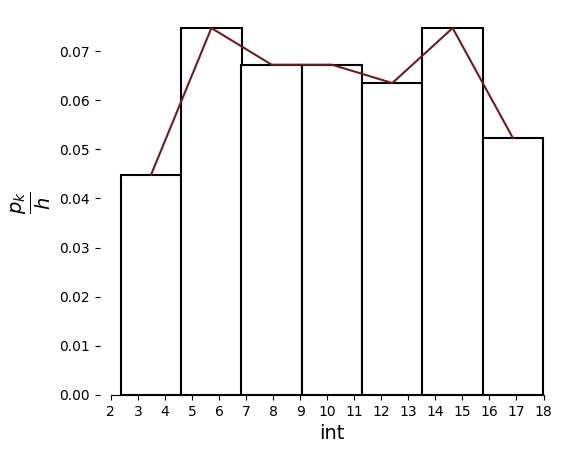

In [209]:
# указывается по оси ординат при построении гистограммы
_histogrammOrdinateAxis = relativeFrequencies / _h

print(f'x: {midRanges}')
print(f'y: {_histogrammOrdinateAxis}')

buildBar(midRanges, _histogrammOrdinateAxis)

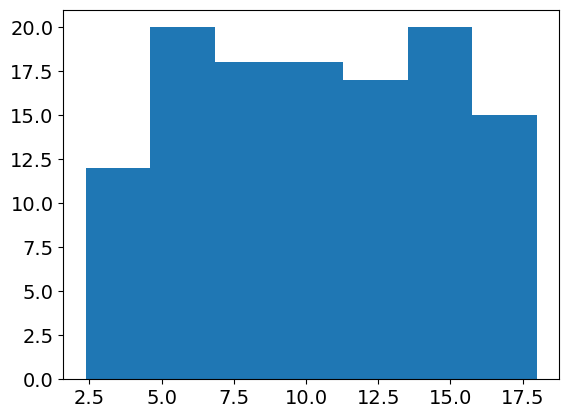

In [210]:
plt.hist(_data, bins=int(_k))
plt.show()

<center><p>4. Вычислите выборочное среднее и выборочную дисперсию</p></center>

In [211]:
# выборочное среднее
_overlineX = (1 / _n) * np.sum(_data) 

# выборочная дисперсия
_S2 = 1 / (_n - 1) * np.sum((_data - _overlineX)**2)

print(f'выборочное среднее: {_overlineX}')
print(f'выборочная дисперсия: {_S2}')

выборочное среднее: 10.2681
выборочная дисперсия: 19.610905216806724


<center><p>5. По виду гистограммы определите возможный закон распределения, оцените параметры этого закона по методу моментов, постройте совмещенные графики гистограммы и плотности предполагаемого закона</p></center>

In [212]:
def align(name, enName, kstestRes, *params):
    def line(n):
        display('-'*n)

    heading: str = f"\\begin{{equation}} " \
                   f"   \\text{{{name}}} " \
                   f"\\end{{equation}}   " \
    
    dataDisplay: str = f"\\begin{{align}}\n" 

    NAME   = 0
    SYMBOL = 1
    VALUE  = 2
    for param in params:
        dataDisplay += f"& \\text{{{param[NAME]}}}, "\
                       f"{param[SYMBOL]}: & \\quad {param[VALUE]} \\\\\n"

    dataDisplay += f"\\end{{align}}" 

    kstestHeading = \
    f"\\begin{{equation}} "                                \
    f"   \\text{{результаты теста Колмогорова-Смирнова}}: " \
    f"\\end{{equation}} "                                  

    statistic          = kstestRes.statistic
    pvalue             = kstestRes.pvalue
    statistic_location = kstestRes.statistic_location
    statistic_sign     = kstestRes.statistic_sign

    statisticDisplay = f'максимальное различие между эмпирической и '      \
                       f'теоретической функциями распределения составляет ' \
                       f'примерно: {int(np.round(statistic, 2) * 100)}\\%'

    pvalueFlag = True if pvalue < 0.05 else False

    pvalueDisplay = f'значение p-уровня значимости: {pvalue} '
    pvalueDisplay += '<' if pvalueFlag else '>'
    pvalueDisplay += f' 0.05'

    if pvalueFlag:
        pvalueDisplay += \
        f' (данные не соответствуют предполагаемому распределению.)'
    else:
        pvalueDisplay += \
        f' (на уровне значимости 0.05 нет оснований отвергнуть гипотезу ' \
        f'о соответствии данных выбранному распределению)'

    statistic_locationDisplay = \
    f'максимальное отклонение наблюдается при значении данных, ' \
    f'равном {statistic_location}'

    statistic_signDisplay = \
    f'в точке максимального отклонения эмпирическая функция распределения '
    statistic_signDisplay += 'ниже' if statistic_sign < 0 else 'выше'
    statistic_signDisplay += ', чем теоретическая'

    kstestResDisplay = [statisticDisplay, 
                        pvalueDisplay, 
                        statistic_locationDisplay, 
                        statistic_signDisplay]

    kstestDisplay  = f"\\begin{{align}}\n" 

    for res in kstestResDisplay:
        kstestDisplay += f"& \\text{{{res}}} \\\\\n"

    kstestDisplay += f"\\end{{align}}" 

    line(200)

    display(Math(heading))
    display(Math(dataDisplay))
    display(Math(kstestHeading))
    display(Math(kstestDisplay))

    match enName:
        case 'norm': 
            def buildLaw(x):
                return sp.stats.norm.pdf(
                            x, 
                            np.mean(_data), 
                            np.std(_data, ddof=1)
                        ), name

        case 'chi2': 
            def buildLaw(x):
                df_chi2 = 2
                return sp.stats.chi2.pdf(
                            x, 
                            df_chi2, 
                            loc=np.min(_data), 
                            scale=np.std(_data)
                        ), name + f'(df={df_chi2})'

        case 'expon': 
            def buildLaw(x):
                return sp.stats.expon.pdf(
                            x, 
                            loc=np.min(_data), 
                            scale=np.mean(_data)-np.min(_data)
                        ), name

        case 'gamma': 
            def buildLaw(x):
                shape_gamma = 2
                return sp.stats.gamma.pdf(
                            x, 
                            shape_gamma, 
                            loc=np.min(_data), 
                            scale=np.std(_data)
                        ), name + f'(shape={shape_gamma})'
            
        case 'poisson': 
            def buildLaw(x):
                lambda_poisson = np.mean(_data) 
                return sp.stats.poisson.pmf(
                            np.floor(x), 
                            lambda_poisson
                        ), name
            
        case 'uniform': 
            def buildLaw(x):
                return sp.stats.uniform.pdf(
                            x, 
                            loc=np.min(_data), 
                            scale=np.ptp(_data)
                        ), name

        case 't': 
            def buildLaw(x):
                df_t = 2
                return sp.stats.t.pdf(
                            x, 
                            df_t, 
                            loc=np.mean(_data), 
                            scale=np.std(_data)
                        ), name + f'(df={np.round(df_t, PRECISION)})'

        case 'lognorm': 
            def buildLaw(x):
                shape_lognorm = np.std(np.log(_data))
                return sp.stats.lognorm.pdf(
                            x, 
                            shape_lognorm, 
                            loc=np.min(_data), 
                            scale=np.exp(np.mean(np.log(_data)))
                        ), name

        case 'beta':  
            def buildLaw(x):
                a_beta = params[0][VALUE]
                b_beta = params[1][VALUE]
                return sp.stats.beta.pdf(
                            (x - np.min(_data)) / np.ptp(_data), 
                            a_beta, 
                            b_beta
                        ) / np.ptp(_data), \
                        name + f'(a={np.round(a_beta, PRECISION)},'\
                               f'\n b={np.round(b_beta, PRECISION)})'
            
        case 'weibull_min': 
            def buildLaw(x):
                shape_weibull = params[0][VALUE]
                return sp.stats.weibull_min.pdf(
                            x, 
                            shape_weibull, 
                            loc=np.min(_data), 
                            scale=np.std(_data)
                        ), \
                        name + f'(shape={np.round(shape_weibull, PRECISION)})'
            
        case default:
            pass

    overlayPlot(buildLaw)

In [213]:
def fillArrays(*args):
    allNames              = args[2]
    allStatistic          = args[3]
    allPvalue             = args[4]
    allStatistic_location = args[5]
    allStatistic_sign     = args[6]

    name = args[1]

    statistic          = args[0].statistic
    pvalue             = args[0].pvalue
    statistic_location = args[0].statistic_location
    statistic_sign     = args[0].statistic_sign

    arrays = [allNames, 
              allStatistic, 
              allPvalue, 
              allStatistic_location, 
              allStatistic_sign]
    data   = [name, 
              statistic, 
              pvalue, 
              statistic_location, 
              statistic_sign]

    for ind, el in enumerate(data):
        arrays[ind].append(el)

    print(f'\\text{{Результаты теста}} \\\\')
    print(f'\\text{{Колмогорова-Смирнова:}} \\\\')
    print(f'\\begin{{aligned}}')
    print(f'    & \\text{{statistic: }} \\hspace{{60pt}} & {np.round(statistic, PRECISION)} \\\\')
    print(f'    & \\text{{pvalue: }} \\hspace{{60pt}} & {np.round(pvalue, PRECISION)} \\\\')
    print(f'    & \\text{{statistic-location: }} \\hspace{{60pt}} & {np.round(statistic_location, PRECISION)} \\\\')
    print(f'    & \\text{{statistic-sign: }} \\hspace{{60pt}} & {np.round(statistic_sign, PRECISION)} \\\\')
    print(f'\\end{{aligned}} \\\\\\\\')

\text{Результаты теста} \\
\text{Колмогорова-Смирнова:} \\
\begin{aligned}
    & \text{statistic: } \hspace{60pt} & 0.08872 \\
    & \text{pvalue: } \hspace{60pt} & 0.28428 \\
    & \text{statistic-location: } \hspace{60pt} & 12.767 \\
    & \text{statistic-sign: } \hspace{60pt} & -1 \\
\end{aligned} \\\\


'--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

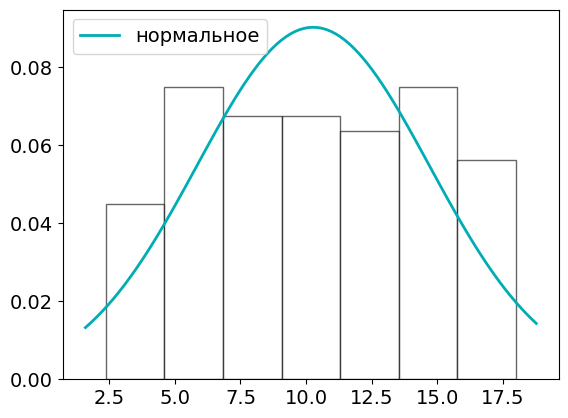

\text{Результаты теста} \\
\text{Колмогорова-Смирнова:} \\
\begin{aligned}
    & \text{statistic: } \hspace{60pt} & 0.17036 \\
    & \text{pvalue: } \hspace{60pt} & 0.00163 \\
    & \text{statistic-location: } \hspace{60pt} & 17.985 \\
    & \text{statistic-sign: } \hspace{60pt} & 1 \\
\end{aligned} \\\\


'--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

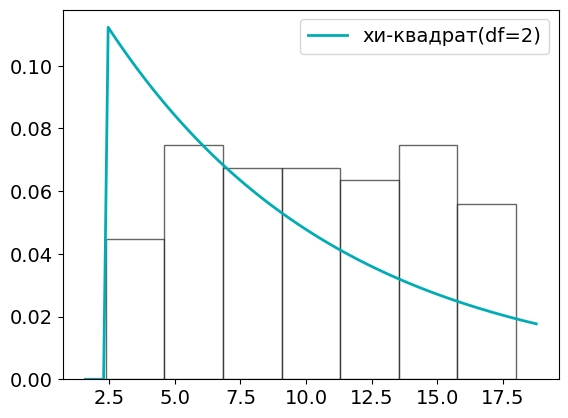

\text{Результаты теста} \\
\text{Колмогорова-Смирнова:} \\
\begin{aligned}
    & \text{statistic: } \hspace{60pt} & 0.18895 \\
    & \text{pvalue: } \hspace{60pt} & 0.00032 \\
    & \text{statistic-location: } \hspace{60pt} & 8.206 \\
    & \text{statistic-sign: } \hspace{60pt} & -1 \\
\end{aligned} \\\\


'--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

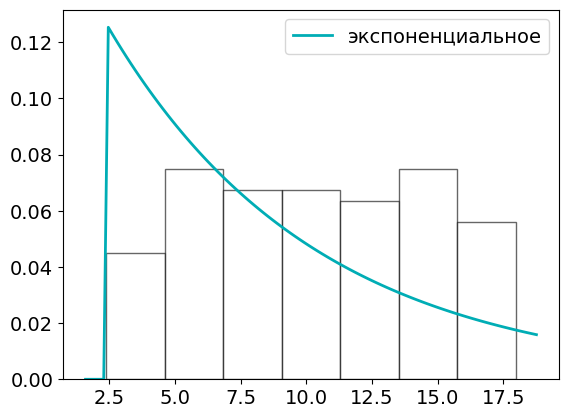

\text{Результаты теста} \\
\text{Колмогорова-Смирнова:} \\
\begin{aligned}
    & \text{statistic: } \hspace{60pt} & 0.13175 \\
    & \text{pvalue: } \hspace{60pt} & 0.02818 \\
    & \text{statistic-location: } \hspace{60pt} & 17.985 \\
    & \text{statistic-sign: } \hspace{60pt} & 1 \\
\end{aligned} \\\\


'--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

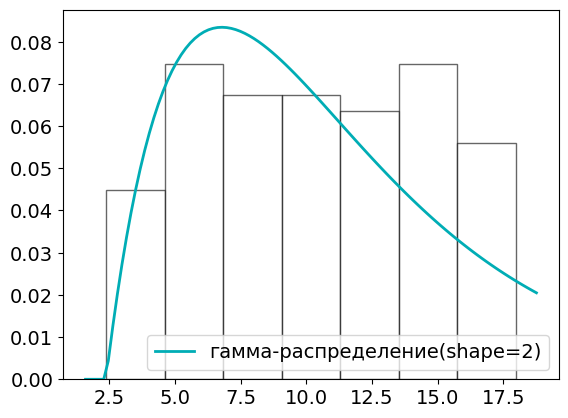

\text{Результаты теста} \\
\text{Колмогорова-Смирнова:} \\
\begin{aligned}
    & \text{statistic: } \hspace{60pt} & 0.19049 \\
    & \text{pvalue: } \hspace{60pt} & 0.00027 \\
    & \text{statistic-location: } \hspace{60pt} & 12.04 \\
    & \text{statistic-sign: } \hspace{60pt} & -1 \\
\end{aligned} \\\\


'--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

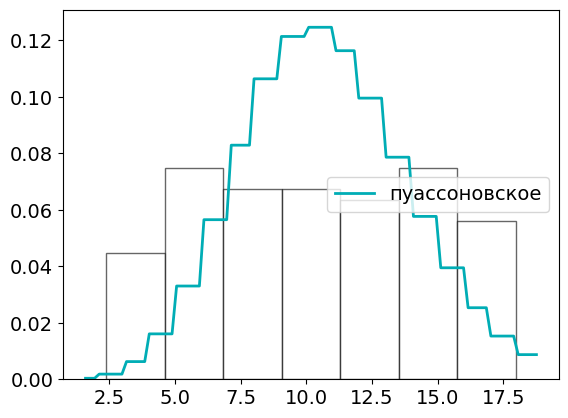

\text{Результаты теста} \\
\text{Колмогорова-Смирнова:} \\
\begin{aligned}
    & \text{statistic: } \hspace{60pt} & 0.048 \\
    & \text{pvalue: } \hspace{60pt} & 0.93243 \\
    & \text{statistic-location: } \hspace{60pt} & 16.195 \\
    & \text{statistic-sign: } \hspace{60pt} & 1 \\
\end{aligned} \\\\


'--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

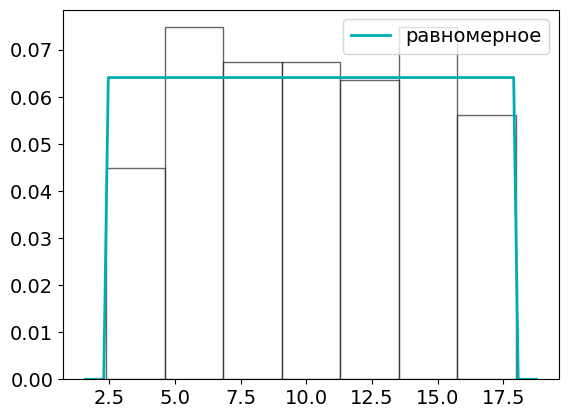

\text{Результаты теста} \\
\text{Колмогорова-Смирнова:} \\
\begin{aligned}
    & \text{statistic: } \hspace{60pt} & 0.11112 \\
    & \text{pvalue: } \hspace{60pt} & 0.09562 \\
    & \text{statistic-location: } \hspace{60pt} & 17.985 \\
    & \text{statistic-sign: } \hspace{60pt} & 1 \\
\end{aligned} \\\\


'--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

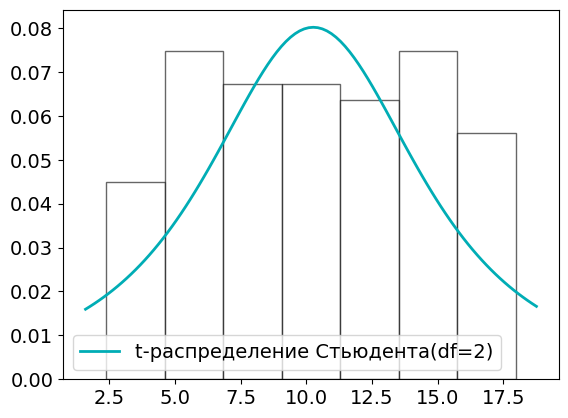

\text{Результаты теста} \\
\text{Колмогорова-Смирнова:} \\
\begin{aligned}
    & \text{statistic: } \hspace{60pt} & 0.19857 \\
    & \text{pvalue: } \hspace{60pt} & 0.00013 \\
    & \text{statistic-location: } \hspace{60pt} & 6.883 \\
    & \text{statistic-sign: } \hspace{60pt} & 1 \\
\end{aligned} \\\\


'--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

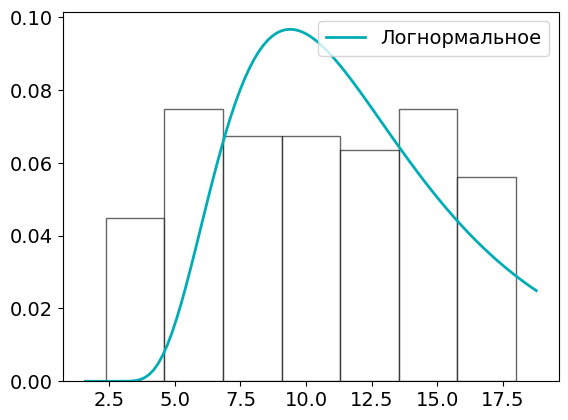

\text{Результаты теста} \\
\text{Колмогорова-Смирнова:} \\
\begin{aligned}
    & \text{statistic: } \hspace{60pt} & 0.0842 \\
    & \text{pvalue: } \hspace{60pt} & 0.34331 \\
    & \text{statistic-location: } \hspace{60pt} & 9.927 \\
    & \text{statistic-sign: } \hspace{60pt} & 1 \\
\end{aligned} \\\\


'--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

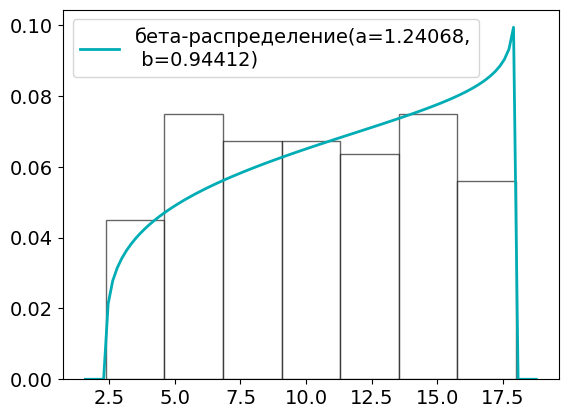

\text{Результаты теста} \\
\text{Колмогорова-Смирнова:} \\
\begin{aligned}
    & \text{statistic: } \hspace{60pt} & 0.5389 \\
    & \text{pvalue: } \hspace{60pt} & 0.0 \\
    & \text{statistic-location: } \hspace{60pt} & 8.905 \\
    & \text{statistic-sign: } \hspace{60pt} & -1 \\
\end{aligned} \\\\


'--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

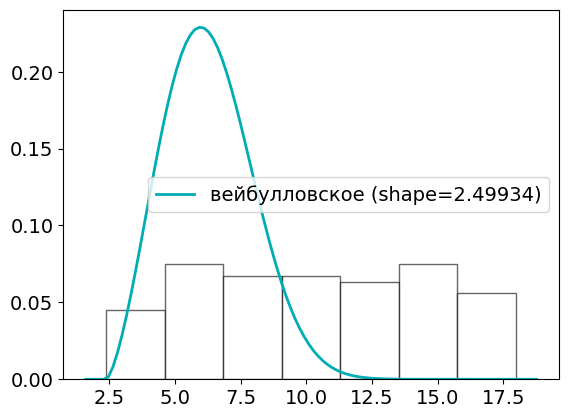

,name,statistic,pvalue,statistic_location,statistic_sign
0,norm,0.089,0.284,12.767,-1
1,chi2,0.170,0.002,17.985,1
2,expon,0.189,0.000,8.206,-1
3,gamma,0.132,0.028,17.985,1
4,poisson,0.190,0.000,12.040,-1
5,uniform,0.048,0.932,16.195,1
6,t,0.111,0.096,17.985,1
7,lognorm,0.199,0.000,6.883,1
8,beta,0.084,0.343,9.927,1
9,weibull_min,0.539,0.000,8.905,-1


In [214]:
data = np.array(_data)

allNames              = []
allStatistic          = []
allPvalue             = []
allStatistic_location = []
allStatistic_sign     = []

# Нормальное распределение (norm)
# mean, std = sp.stats.norm.fit(data)
mean = np.mean(_data)
std = np.std(_data, ddof=1)
result = sp.stats.kstest(data, 'norm', args=(mean, std))
fillArrays(result, 
           'norm', 
           allNames, 
           allStatistic, 
           allPvalue, 
           allStatistic_location, 
           allStatistic_sign)
align('нормальное', 'norm', result, ['среднее', '\\mu', mean], 
                                    ['стандратное отклонение', '\\sigma', std])

# Распределение хи-квадрат (chi2)
# df, loc, scale = sp.stats.chi2.fit(data)
df = 2
loc = np.min(_data)
scale = np.std(_data)
result = sp.stats.kstest(data, 'chi2', args=(df, loc, scale))
fillArrays(result, 
           'chi2', 
           allNames, 
           allStatistic, 
           allPvalue, 
           allStatistic_location, 
           allStatistic_sign)
align('хи-квадрат', 'chi2', result, ['количество степеней свободы', '', df], 
                                    ['сдвиг ', '', loc],
                                    ['параметр масштаба', '', scale])

# Экспоненциальное распределение (expon)
# loc, scale = sp.stats.expon.fit(data)
loc = np.min(_data)
scale = np.mean(_data) - np.min(_data)
result = sp.stats.kstest(data, 'expon', args=(loc, scale))
fillArrays(result, 
           'expon', 
           allNames, 
           allStatistic, 
           allPvalue, 
           allStatistic_location, 
           allStatistic_sign)
align('экспоненциальное', 'expon', result, ['сдвиг', '', loc], 
                                           ['параметр масштаба', '\\frac{1}{\\lambda}', scale])

# Гамма-распределение (gamma)
# shape, loc, scale = sp.stats.gamma.fit(data)
shape = 2
loc = np.min(_data)
scale = np.std(_data)
result = sp.stats.kstest(data, 'gamma', args=(shape, loc, scale))
fillArrays(result, 
           'gamma', 
           allNames, 
           allStatistic, 
           allPvalue, 
           allStatistic_location, 
           allStatistic_sign)
align('гамма-распределение', 'gamma', result, ['параметр формы', '', shape], 
                                              ['сдвиг ', '', loc],
                                              ['параметр масштаба', '', scale])

# Пуассоновское распределение (poisson)
lambda_ = np.mean(data)
result = sp.stats.kstest(data, 'poisson', args=(lambda_,))
fillArrays(result, 
           'poisson', 
           allNames, 
           allStatistic, 
           allPvalue, 
           allStatistic_location, 
           allStatistic_sign)
align('пуассоновское', 'poisson', result, ['параметр интенсивности', '\\mu', lambda_])

# Равномерное распределение (uniform)
# loc, scale = sp.stats.uniform.fit(data)
loc = np.min(_data)
scale = np.ptp(_data)
result = sp.stats.kstest(data, 'uniform', args=(loc, scale))
fillArrays(result, 
           'uniform', 
           allNames, 
           allStatistic, 
           allPvalue, 
           allStatistic_location, 
           allStatistic_sign)
align('равномерное', 'uniform', result, ['нижняя граница', '', loc], 
                                        ['размах', '', scale])

# t-распределение Стьюдента (t)
# df, loc, scale = sp.stats.t.fit(data)
df = 2
loc = np.mean(_data)
scale = np.std(_data)
result = sp.stats.kstest(data, 't', args=(df, loc, scale))
fillArrays(result, 
           't', 
           allNames, 
           allStatistic, 
           allPvalue, 
           allStatistic_location, 
           allStatistic_sign)
align('t-распределение Стьюдента', 't', result, ['количество степеней свободы', '', df], 
                                                ['сдвиг', '', loc],
                                                ['масштаб', '', scale])

# Логнормальное распределение (lognorm)
# shape, loc, scale = sp.stats.lognorm.fit(data)
shape = np.std(np.log(_data))
loc = np.min(_data)
scale = np.exp(np.mean(np.log(_data)))
result = sp.stats.kstest(data, 'lognorm', args=(shape, loc, scale))
fillArrays(result, 
           'lognorm', 
           allNames, 
           allStatistic, 
           allPvalue, 
           allStatistic_location, 
           allStatistic_sign)
align('Логнормальное', 'lognorm', result, ['параметр формы', '', shape], 
                                          ['сдвиг', '', loc],
                                          ['параметр масштаба', '', scale])

# Бета-распределение (beta)
a, b, loc, scale = sp.stats.beta.fit(data)
result = sp.stats.kstest(data, 'beta', args=(a, b, loc, scale))
fillArrays(result, 
           'beta', 
           allNames, 
           allStatistic, 
           allPvalue, 
           allStatistic_location, 
           allStatistic_sign)
align('бета-распределение', 'beta', result, ['параметр формы 1', '', a], 
                                            ['параметр формы 2', '', b],
                                            ['сдвиг', '', loc],
                                            ['масштаб', '', scale])

# Распределение Вейбулла (weibull_min)
c, loc, scale = sp.stats.weibull_min.fit(data)
loc = np.min(_data)
scale = np.std(_data)
result = sp.stats.kstest(data, 'weibull_min', args=(c, loc, scale))
fillArrays(result, 
           'weibull_min', 
           allNames, 
           allStatistic, 
           allPvalue, 
           allStatistic_location, 
           allStatistic_sign)
align('вейбулловское ', 'weibull_min', result, ['параметр формы', '', c], 
                                               ['сдвиг', '', loc],
                                               ['масштаб', '', scale])


_kstestData = pd.DataFrame({
    'name': allNames,
    'statistic': allStatistic,
    'pvalue': allPvalue,
    'statistic_location': allStatistic_location,
    'statistic_sign': allStatistic_sign
})

_kstestData

In [215]:
# pvalue - Если pvalue меньше заранее установленного уровня значимости (например, 0.05), то нулевая гипотеза отвергается, что означает, что данные не соответствуют предполагаемому распределению.
_kstestData_filtered = _kstestData[_kstestData['pvalue'] > 0.05]
_kstestData_filtered

,name,statistic,pvalue,statistic_location,statistic_sign
0,norm,0.089,0.284,12.767,-1
5,uniform,0.048,0.932,16.195,1
6,t,0.111,0.096,17.985,1
8,beta,0.084,0.343,9.927,1


In [216]:
# statistic - Чем больше значение, тем сильнее различие между данными и теоретическим распределением.
_kstestData_filtered.sort_values(by='statistic')

,name,statistic,pvalue,statistic_location,statistic_sign
5,uniform,0.048,0.932,16.195,1
8,beta,0.084,0.343,9.927,1
0,norm,0.089,0.284,12.767,-1
6,t,0.111,0.096,17.985,1


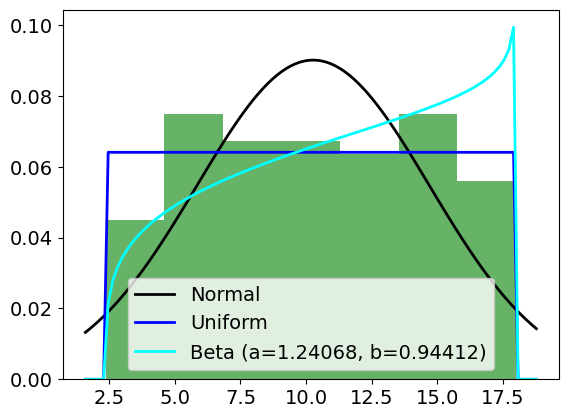

In [217]:
# Рассчитываем параметры выборки
mean = np.mean(_data)
std = np.std(_data, ddof=1)

# Гистограмма выборки
plt.hist(_data, bins=7, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Проверка на нормальное распределение
p = sp.stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal')

# Проверка на равномерное распределение
uniform_fit = sp.stats.uniform.pdf(
                    x, 
                    loc=np.min(_data), 
                    scale=np.ptp(_data)
              )
plt.plot(x, uniform_fit, 'b', linewidth=2, label='Uniform')

# Проверка на бета распределение
a_beta, b_beta = 1.2406801559765772, 0.9441200264826078  # Параметры формы
beta_fit = sp.stats.beta.pdf(
                (x - np.min(_data)) / np.ptp(_data), 
                a_beta, 
                b_beta
           ) / np.ptp(_data)
plt.plot(x, beta_fit, 'cyan', linewidth=2, 
                              label='Beta (a=1.24068, b=0.94412)')

# # Проверка на экспоненциальное распределение
# exp_fit = sp.stats.expon.pdf(x, loc=np.min(_data), scale=np.mean(_data)-np.min(_data))
# plt.plot(x, exp_fit, 'r', linewidth=2, label='Exponential PDF')

# Добавляем легенду и выводим график
plt.legend()
plt.show()

In [218]:
_a = _overlineX - np.sqrt(3 * _S2)
_b = _overlineX + np.sqrt(3 * _S2)

print(f'a: {_a}')
print(f'b: {_b}')

a: 2.597851265413868
b: 17.938348734586132


<center><p>6. Найдите эмпирическую функцию распределения и постройте совмещенные графики эмпирической и теоретической функций распределения</p></center>

In [219]:
# столбец накопленных частот
_kum = np.zeros(np.size(relativeFrequencies) + 1)
ind = 1 
for relativeFrequency in relativeFrequencies:
    _kum[ind] = _kum[ind-1] + relativeFrequencies[ind-1]
    ind += 1
print(f'kum: {_kum}')

kum: [0.      0.1     0.26667 0.41667 0.56667 0.70834 0.87501 0.99168]


In [220]:
def femp(x):
    def ind(x):
        return 1 if x > 0 else 0

    sumy = 0 
    for i in range(int(_k)):
        sumy += relativeFrequencies[i] * ind(x - midRanges[i])
    
    return sumy

In [221]:
def buildFemp(cdf_y_values):
    RED   = '#6F1D1B'
    BLUE  = '#00ADB5'
    WHITE = '#EEEEEE'
    BLACK = '#393E46' # #253031 #0D1B1E #1C2321

    # Define font sizes
    SIZE_DEFAULT = 14
    SIZE_LARGE   = 16
    SIZE_TICKS   = 10
    plt.rc("font", weight="normal")          # controls default font
    plt.rc("font", size=SIZE_DEFAULT)        # controls default text sizes
    plt.rc("axes", titlesize=SIZE_LARGE)     # fontsize of the axes title
    plt.rc("axes", labelsize=SIZE_DEFAULT)   # fontsize of the x and y labels
    plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
    plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

    fig, ax = plt.subplots(
        figsize=(6, 5)
    )

    # Generate a range of x values
    x_values = np.linspace(0, np.max(_data) + np.min(_data), 100)

    # Evaluate the function for each x value
    femp_y_values = [femp(x) for x in x_values]

    cdf_y_values = cdf_y_values(x_values)
    # cdf_y_values = [sp.stats.expon.cdf(x, scale=1/_param) for x in x_values]

    xticks = [i for i in range(0, int(np.max(_data) + np.min(_data)) + 1)]
    yticks = np.arange(0, 1.2 + 0.1, 0.1)

    # Hide the all but the bottom spines (axis lines)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    ax.spines["bottom"].set_bounds(min(xticks), max(xticks))

    # Plot femp(x)
    plt.plot(x_values, femp_y_values, label='femp(x)', color=RED)

    # Plot the cumulative distribution function
    plt.plot(x_values, cdf_y_values, label='CDF(x)', color='black')

    # plot y = 1 line
    plt.plot(x_values, np.full_like(x, 1), label='y = 1', linestyle='--', color='black')

    # axis names
    plt.xlabel('x')
    plt.ylabel('F(x)')

    plt.xticks(xticks)
    plt.yticks(yticks)

    # Adjust the font size of the tick labels
    plt.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    plt.grid(True)

    plt.show()


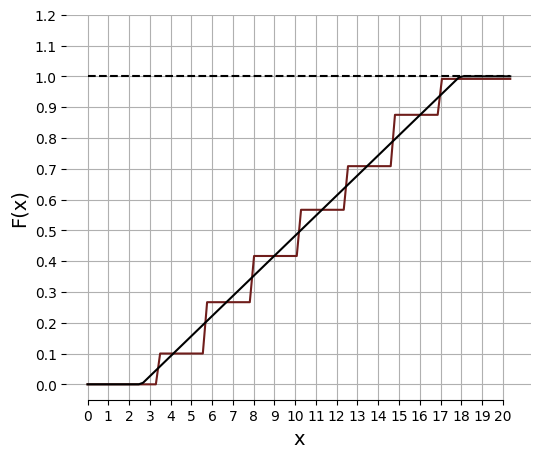

In [222]:
# uniform
def uniform_y_values(x_values):
    return [sp.stats.uniform.cdf(
                x, 
                loc=_a, 
                scale=_b - _a
            ) for x in x_values]

buildFemp(uniform_y_values)

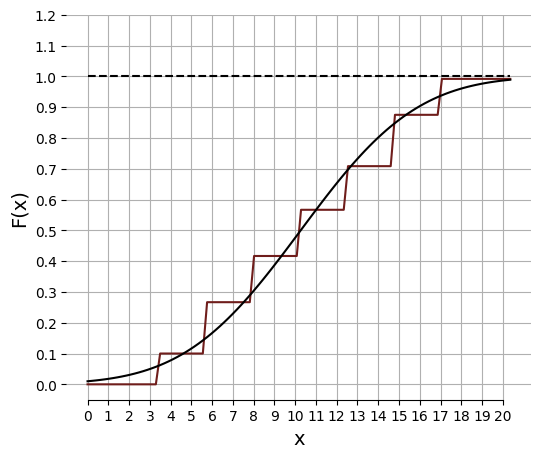

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [223]:
# norm 
def norm_y_values(x_values):
    mean, std = sp.stats.norm.fit(data)
    return [sp.stats.norm.cdf(x, mean, std) for x in x_values]

buildFemp(norm_y_values)

display(Math(f'\\mu: {mean}'))
display(Math(f'\\sigma^2: {std**2}'))

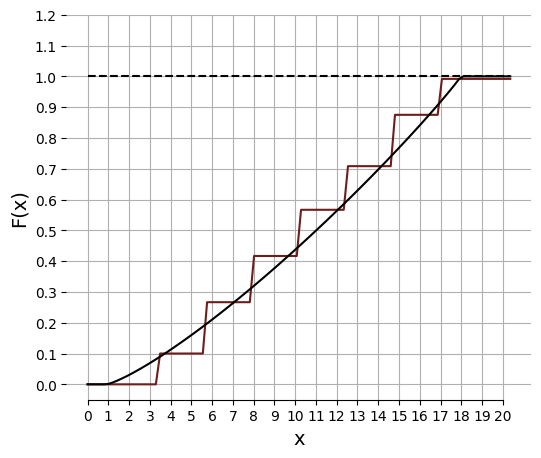

<IPython.core.display.Math object>

<IPython.core.display.Math object>

сдвиг (loc): 2.375
масштаб (scale): 4.409929818791527


In [224]:
# beta 
def beta_y_values(x_values):
    a, b, loc, scale = sp.stats.beta.fit(data)
    return [sp.stats.beta.cdf(x, a, b, loc, scale) for x in x_values]

buildFemp(beta_y_values)

display(Math(f'\\alpha: {a}'))
display(Math(f'\\beta: {b}'))
print(f'сдвиг (loc): {loc}')
print(f'масштаб (scale): {scale}')